In [1]:
#loading Libraries
import numpy as np  
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report

In [2]:
#Ploting and Scoring Function
def plot_graphs(trainedalgo, X_Test, Y_Test, Y_hat):
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import plot_precision_recall_curve
    import matplotlib.pyplot as plt
    from sklearn.metrics import plot_confusion_matrix
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(trainedalgo, X_Test, Y_Test,cmap=plt.cm.Blues,normalize=normalize)
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)

    plt.show()
    print(classification_report(Y_Test,Y_hat))
    import scikitplot as skplt
    y_probas_roc = trainedalgo.predict_proba(X_Test)
    roc = skplt.metrics.plot_roc(Y_Test, y_probas_roc,figsize=(45,45),text_fontsize=100,title_fontsize=150)   
    plt.xlabel('False Positive Rate', fontsize=160)
    plt.ylabel('True Positive Rate', fontsize=160)
    for l in roc.lines:
        l.set_lw(25)
    plt.show()
    #Average Precision score
    from sklearn.metrics import average_precision_score
    average_precision_rand = average_precision_score(Y_Test, Y_hat)
    print('Average precision-recall score Random forest: {0:0.2f}'.format(
          average_precision_rand))
    ## Curve for Randdom forrest
    y_probas = trainedalgo.predict_proba(X_Test)
    ax = skplt.metrics.plot_precision_recall(Y_Test, y_probas,figsize=(45,45),text_fontsize=80,title_fontsize=150)
    plt.xlabel('Recall', fontsize=160)
    plt.ylabel('Precision', fontsize=160)
    plt.xticks(fontsize=100)
    plt.yticks(fontsize=100)
    for l in ax.lines:
        l.set_lw(25)
    plt.show()    
    from sklearn.metrics import precision_recall_fscore_support
    precision_recall_fscore_support(Y_Test, Y_hat)

In [3]:
#Reading CSV File
df = pd.read_excel('Mini_protein_data_Ha_Mini_dataset_1_1_for_ml.xlsx')
df2 = pd.read_excel('Mini_protein_data_Ha_for_ml.xlsx')

In [15]:
#Defining Lables and Features
#Feature Transformations:- Label encoder and Robust Scaler; Feature Extraction; LocallyLinearEmbedding dimention reduction
X = df.drop(['Category_0-1_2_3_4'], axis = 1)
Y = df['Category_0-1_2_3_4']
Y = LabelEncoder().fit_transform(Y)
X = RobustScaler().fit_transform(X)    
X_train, X_val, y_train, y_val =train_test_split(X,Y, random_state =0)
randomforest = RandomForestClassifier(class_weight='balanced')
randomforest.fit(X_train,y_train) #training dataset
sfm = SelectFromModel(randomforest, prefit=True) #feature selection using select from 
X_train = sfm.transform(X_train)
X_val = sfm.transform(X_val)
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X_train,y_train)
X_train=lda.transform(X_train)
X_val=lda.transform(X_val)

In [11]:
df2

,Category,Category_0_1,Category_0_1-2_3_4,Category_0-1_2_3_4,Mono_total_score,Mono_AlaCount,Mono_bb,Mono_buried_minus_exposed,Mono_buried_np,Mono_buried_over_exposed,...,Core_res_w,Core_res_I,Core_total,Positive_charge_H,Positive_charge_K,Positive_charge_R,Positive_total,Negative_charge_D,Negative_charge_E,Negative_total
0,0,0,0,0,-2.89,0.12,-0.01,69.91,114.51,0.06,...,1,2,8,2,1,0,3,1,4,5
1,4,1,1,1,-2.96,0.15,-0.01,72.47,117.39,0.07,...,1,3,11,2,4,2,8,0,5,5
2,0,0,0,0,-3.17,0.05,-0.01,67.35,113.36,0.06,...,2,2,8,3,2,0,5,2,4,6
3,0,0,0,0,-3.31,0.17,-0.01,71.46,117.38,0.06,...,2,2,10,4,0,0,4,1,1,2
4,0,0,0,0,-2.88,0.17,-0.01,70.44,116.21,0.06,...,1,3,10,3,4,0,7,2,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27067,0,0,0,0,-3.00,0.07,-0.01,71.21,112.45,0.07,...,1,1,6,0,2,5,7,4,5,9
27068,0,0,0,0,-1.86,0.07,-0.01,63.18,112.69,0.06,...,1,2,8,0,2,4,6,1,3,4
27069,0,0,0,0,-1.64,0.21,0.00,60.49,112.93,0.05,...,0,5,13,0,8,2,10,1,5,6
27070,0,0,0,0,-3.45,0.14,0.00,81.77,123.33,0.07,...,1,4,13,0,2,2,4,3,6,9


In [19]:
X2 = df2.drop(['Category_0-1_2_3_4','Category','Category_0_1','Category_0_1-2_3_4'], axis = 1)
Y2 = df2['Category_0-1_2_3_4']
Y2 = LabelEncoder().fit_transform(Y2)
X2 = RobustScaler().fit_transform(X2) 
X_val2 = sfm.transform(X2)
X_val2=lda.transform(X_val2)

In [20]:
#Trainig a Random Forest 
randomfor = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
randomfor.fit(X_train, y_train)
y_RandomForest = randomfor.predict(X_val)
print("Random forest accuracy Best Kernel score :" , accuracy_score(y_val, y_RandomForest))

Random forest accuracy Best Kernel score : 0.8431372549019608


In [21]:
y_RandomForest2 = randomfor.predict(X_val2)
print("Random forest accuracy Best Kernel score :" , accuracy_score(Y2, y_RandomForest2))

Random forest accuracy Best Kernel score : 0.6330156619385343


Confusion matrix, without normalization
[[14821  8538]
 [ 1397  2316]]
Normalized confusion matrix
[[0.63448778 0.36551222]
 [0.37624562 0.62375438]]


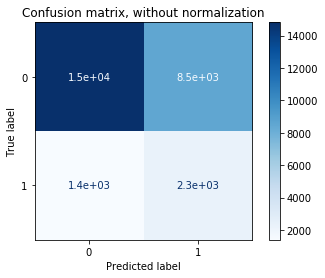

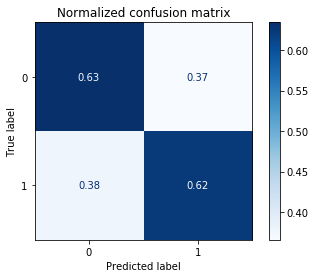

              precision    recall  f1-score   support

           0       0.91      0.63      0.75     23359
           1       0.21      0.62      0.32      3713

    accuracy                           0.63     27072
   macro avg       0.56      0.63      0.53     27072
weighted avg       0.82      0.63      0.69     27072



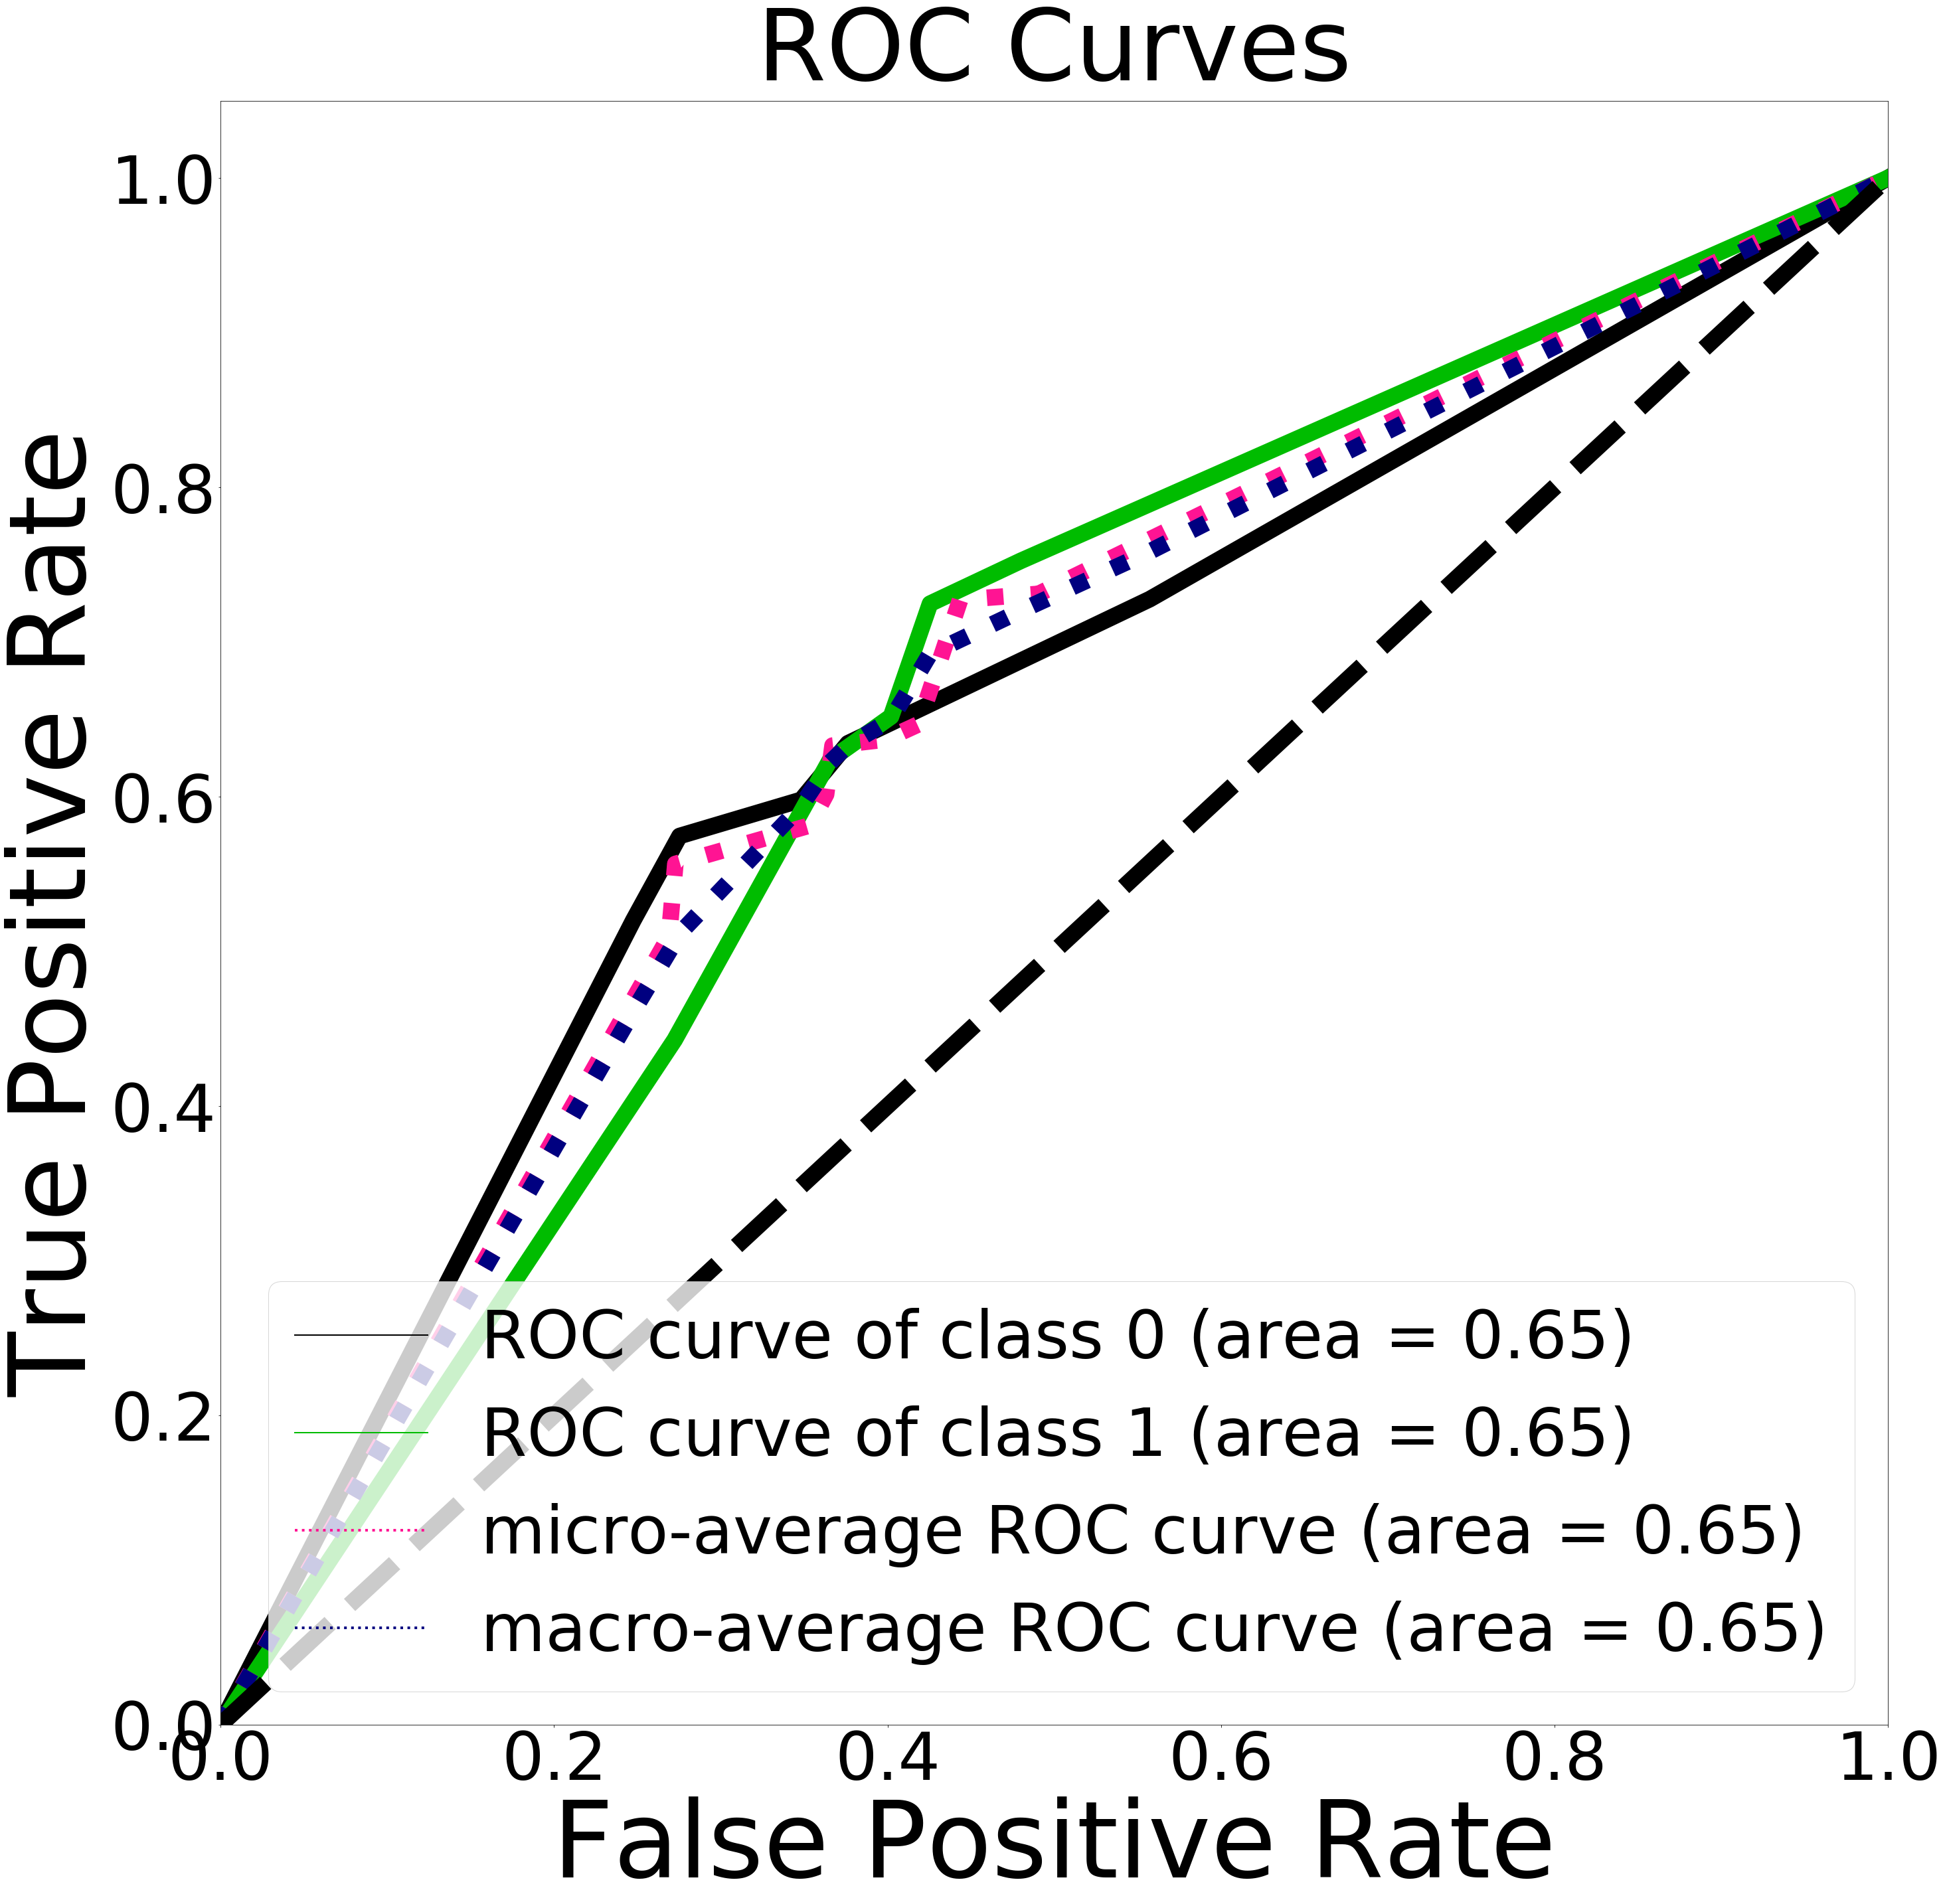

Average precision-recall score Random forest: 0.18


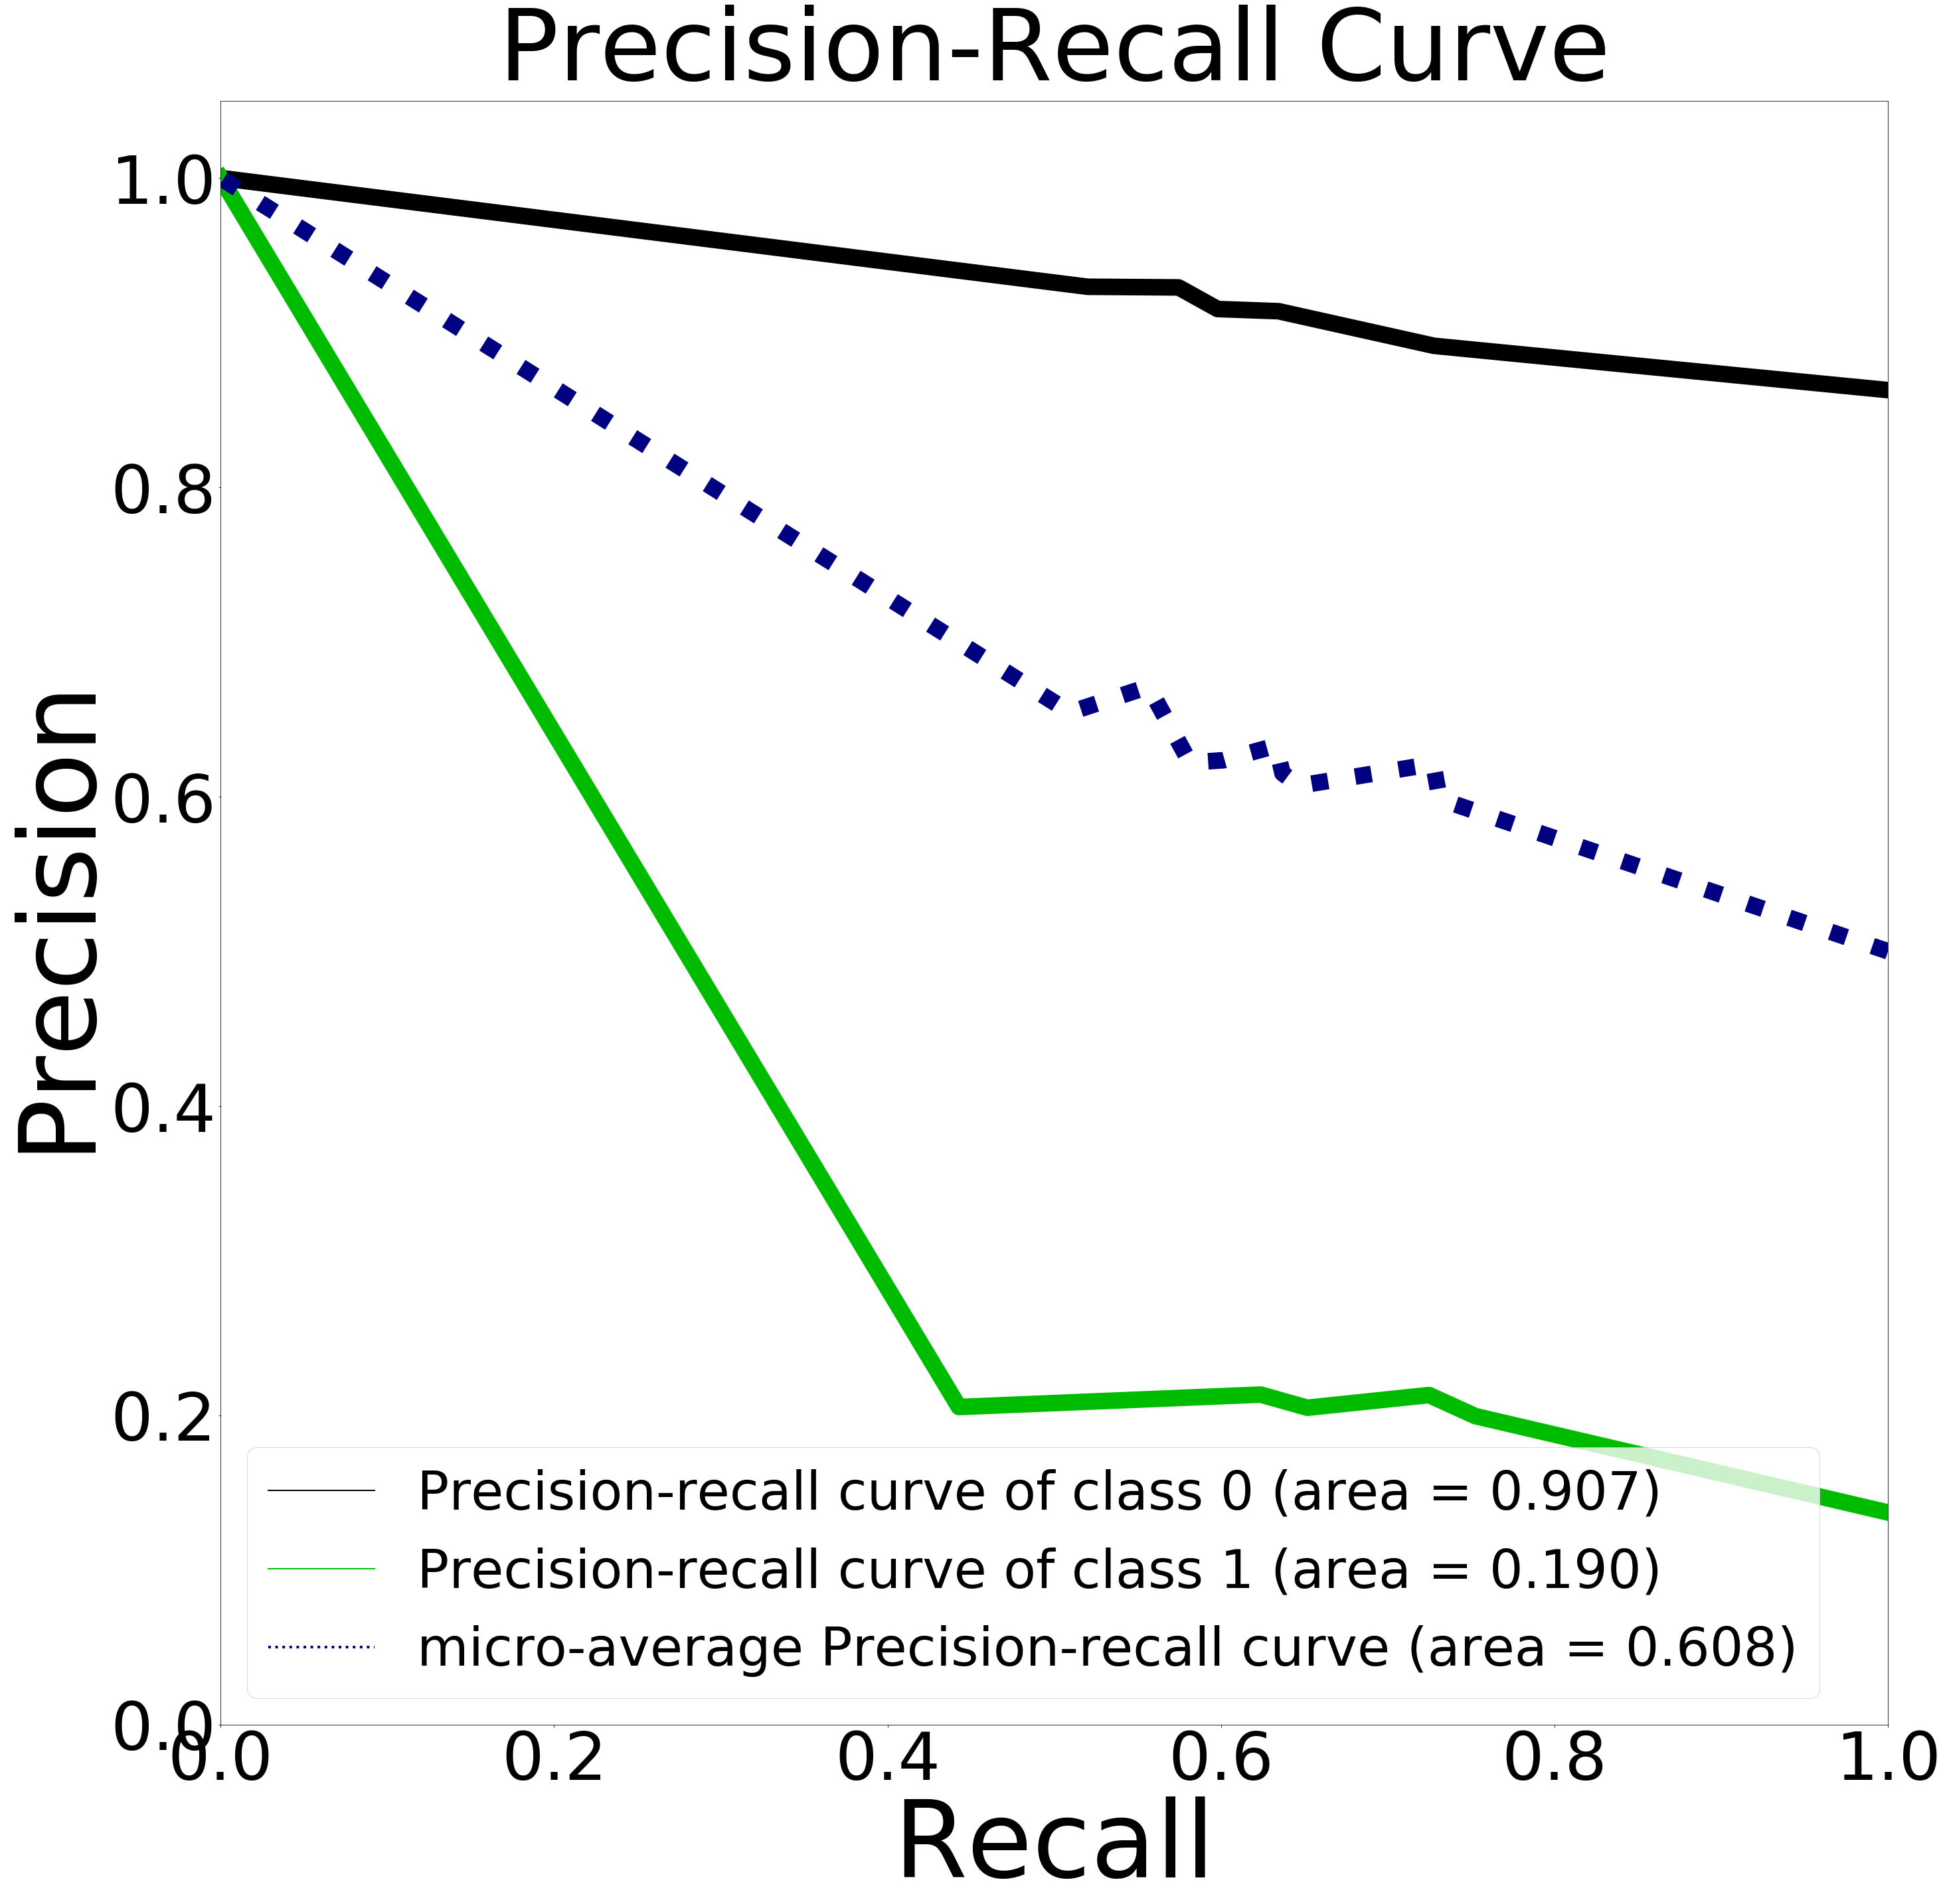

In [22]:
#Evaluation Random Forest
plot_graphs(randomfor,X_val2,Y2,y_RandomForest2)

In [9]:
import pickle
Pkl_Filename = "HA_Minidataset_1-1_tuned_RandomForest.pkl"  
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(randomfor, file)